In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("weatherAUS.csv")

In [20]:
df = df[df['RainTomorrow'].notna()]
df = df.drop(['Date'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

#### Encodeing The data

In [21]:
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
Encoded_Array = Encoder.fit_transform(df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']])
Encoded_column = Encoder.get_feature_names_out(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'])
Encoded_df = pd.DataFrame(Encoded_Array,columns=Encoded_column,index=df.index)

df = df.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'])
df = pd.concat([df,Encoded_df],axis=1)

In [22]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,...,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.026570,0.768899,0.221213,0.009888
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,...,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.160822,0.421539,0.415065,0.098946
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



#### Here We Have too much NaN's For Evaporation,Sunshine,Cloud3PM,Cloud9Am And they Are important Aspact of our RainTomorrow.
#### So for every NaN's We Predict that With Our RandomForestRegressor Beacause that Feature's are also Depended on Other Feature.


In [23]:
# df['RainTomorrow']

from sklearn.ensemble import RandomForestRegressor
tempModel = RandomForestRegressor(random_state=42)

train_row = df['Evaporation'].notna()
pre_row = df['Evaporation'].isna()


X_train = df.loc[train_row].drop(['Evaporation', 'RainTomorrow'], axis=1)
y_train = df.loc[train_row]['Evaporation']

X_predict = df.loc[pre_row].drop(['Evaporation', 'RainTomorrow'], axis=1)



In [24]:
tempModel.fit(X_train,y_train)

predicted_evep = tempModel.predict(X_predict)

In [25]:
df.loc[pre_row, 'Evaporation'] = predicted_evep

In [26]:
# df.describe()

In [27]:
train_in = df['Sunshine'].notna() 
pre_out = df['Sunshine'].isna()

suntemp = RandomForestRegressor(random_state = 42)

X_train = df.loc[train_in].drop(['Sunshine','RainTomorrow'],axis=1)
y_train = df.loc[train_in]['Sunshine']
X_pred = df.loc[pre_out].drop(['Sunshine','RainTomorrow'],axis=1)

In [28]:
suntemp.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
predicted_sun = suntemp.predict(X_pred)

In [30]:
df.loc[pre_out,'Sunshine'] = predicted_sun

In [31]:
# Fill missing values in Cloud9am and Cloud3pm
train_in = df['Cloud9am'].notna()
pre_out = df['Cloud9am'].isna()

X_train = df.loc[train_in].drop(['Cloud9am', 'RainTomorrow'], axis=1)
y_train = df.loc[train_in]['Cloud9am']
X_pred = df.loc[pre_out].drop(['Cloud9am', 'RainTomorrow'], axis=1)

suntemp.fit(X_train, y_train)
predicted_sun = suntemp.predict(X_pred)
df.loc[pre_out, 'Cloud9am'] = predicted_sun

train_in = df['Cloud3pm'].notna()
pre_out = df['Cloud3pm'].isna()

X_train = df.loc[train_in].drop(['Cloud3pm', 'RainTomorrow'], axis=1)
y_train = df.loc[train_in]['Cloud3pm']
X_pred = df.loc[pre_out].drop(['Cloud3pm', 'RainTomorrow'], axis=1)

suntemp.fit(X_train, y_train)
predicted_sun = suntemp.predict(X_pred)
df.loc[pre_out, 'Cloud3pm'] = predicted_sun


In [32]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [33]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.361869,7.418297,39.984292,14.001988,18.637576,68.843810,51.482606,...,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.026570,0.768899,0.221213,0.009888
std,6.388924,7.109554,8.423217,3.715948,3.484696,13.138385,8.851082,8.721551,18.932077,20.532065,...,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.160822,0.421539,0.415065,0.098946
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.800000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,12.000000,22.700000,0.000000,4.800000,8.025000,39.000000,13.000000,18.637576,70.000000,51.482606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.116000,10.200000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.to_csv("cleaned_data.csv", index=False)

#### Spliting The data

In [35]:
from sklearn.model_selection import train_test_split

X_train = df.drop(['RainTomorrow'],axis=1)
y_train = df['RainTomorrow']

X_t,X_test,y_t,y_test = train_test_split(X_train,y_train,test_size=0.3)

print(X_t.shape)
print(y_t.shape)

(99535, 119)
(99535,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

model.fit(X_t,y_t)




In [44]:
predict = model.predict(X_test)

In [45]:
y_test = y_test.replace({'Yes':1,'No':0})
model.score(X_test,y_test)

/tmp/ipykernel_4230/3881276157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Yes':1,'No':0})


0.8577992404707206

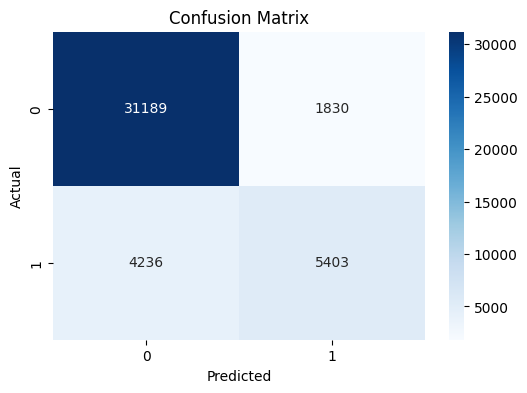


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     33019
           1       0.75      0.56      0.64      9639

    accuracy                           0.86     42658
   macro avg       0.81      0.75      0.78     42658
weighted avg       0.85      0.86      0.85     42658



In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict using your test set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Classification Report (Precision, Recall, F1-score)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)


In [47]:
import joblib
joblib.dump(model,'WeatherAUS.joblib')

['WeatherAUS.joblib']

In [48]:
loaded_Model = joblib.load('WeatherAUS.joblib')